# Project - Data Insight - Covid data using Python Pandas

   ### Name : Shivam Thete
   ### Student ID: C0848366
   


**Understanding the latest Covid-19 data set for Ontario and getting insights using Pandas.**


In [28]:
import pandas as pd
import numpy as np

**Loading the Dataset**

In [29]:
Outbreaks_Ontario = pd.read_csv("F:\Shivam\Academics_Term 1\Big Data Fundamentals\Project\ongoing_outbreaks_phu.csv")
print (Outbreaks_Ontario)

             date                    phu_name  phu_num       outbreak_group  \
0      2020-11-01                BRANT COUNTY     2227          4 Workplace   
1      2020-11-01                BRANT COUNTY     2227    1 Congregate Care   
2      2020-11-01                CHATHAM-KENT     2240       5 Recreational   
3      2020-11-01                CHATHAM-KENT     2240      6 Other/Unknown   
4      2020-11-01                CHATHAM-KENT     2240          4 Workplace   
...           ...                         ...      ...                  ...   
47582  2022-03-14  WELLINGTON-DUFFERIN-GUELPH     2266    1 Congregate Care   
47583  2022-03-14        WINDSOR-ESSEX COUNTY     2268  2 Congregate Living   
47584  2022-03-14        WINDSOR-ESSEX COUNTY     2268    1 Congregate Care   
47585  2022-03-14                 YORK REGION     2270  2 Congregate Living   
47586  2022-03-14                 YORK REGION     2270    1 Congregate Care   

       number_ongoing_outbreaks  
0                

**Understanding the datatypes from the Dataset**

In [30]:
Outbreaks_Ontario.dtypes

date                        object
phu_name                    object
phu_num                      int64
outbreak_group              object
number_ongoing_outbreaks     int64
dtype: object

**To check missing values within the Dataset**

In [31]:
Outbreaks_Ontario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47587 entries, 0 to 47586
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      47587 non-null  object
 1   phu_name                  47587 non-null  object
 2   phu_num                   47587 non-null  int64 
 3   outbreak_group            47587 non-null  object
 4   number_ongoing_outbreaks  47587 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


## Finding Insights using Pandas

*Since now we know how the dataframe looks for the ongoing Covid-19 data for Ontario province, we are going to find some valuable insights which will help us understand the data and take suitable actions for the ongoing situatuon*

## 1. To find the number of active Covid - 19 cases as of the current date


**Active cases as of 2022-03-15, that is the cases which have not been recovered yet**

*Assuming that the patients who contracted Covid-19 in the last 7 days are not recovered yet and have the potential of spreading the virus. Hence, they are defined as active cases as of today's date.*


In [32]:
df = Outbreaks_Ontario

last_seven_days = df. loc[(df["date"] >= "2022-03-06") & (df["date"] <= "2022-03-14")]
print(last_seven_days)

active_cases = last_seven_days["number_ongoing_outbreaks"]. sum()
print('The number of total active cases in Ontario is ', active_cases)

             date                    phu_name  phu_num       outbreak_group  \
47017  2022-03-06             ALGOMA DISTRICT     2226       5 Recreational   
47018  2022-03-06             ALGOMA DISTRICT     2226    1 Congregate Care   
47019  2022-03-06             ALGOMA DISTRICT     2226  2 Congregate Living   
47020  2022-03-06                BRANT COUNTY     2227  2 Congregate Living   
47021  2022-03-06                CHATHAM-KENT     2240    1 Congregate Care   
...           ...                         ...      ...                  ...   
47582  2022-03-14  WELLINGTON-DUFFERIN-GUELPH     2266    1 Congregate Care   
47583  2022-03-14        WINDSOR-ESSEX COUNTY     2268  2 Congregate Living   
47584  2022-03-14        WINDSOR-ESSEX COUNTY     2268    1 Congregate Care   
47585  2022-03-14                 YORK REGION     2270  2 Congregate Living   
47586  2022-03-14                 YORK REGION     2270    1 Congregate Care   

       number_ongoing_outbreaks  
47017            

#### The number of total active cases in Ontario is 1890.


## 2. To find the group with most active cases in the last 7 days in Ontario.

*This will give an important insight about the super-spreader or the most affected group in order to take prescriptive steps accordingly.* 

In [33]:
last_seven_days = df. loc[(df["date"] >= "2022-03-06") & (df["date"] <= "2022-03-14")]

max_cases_group = last_seven_days.groupby(['outbreak_group']).sum()
max_cases_group = max_cases_group.drop('phu_num', axis = 1)
max_cases_group_desc = max_cases_group.sort_values('number_ongoing_outbreaks', ascending=False)

print(max_cases_group_desc, "\n")
max_num = max_cases_group_desc.max()
print("The group with maximum number of active cases in Ontario is Congregate Care: ", max_num)

                     number_ongoing_outbreaks
outbreak_group                               
1 Congregate Care                        1140
2 Congregate Living                       623
3 Education                                68
4 Workplace                                35
6 Other/Unknown                            18
5 Recreational                              6 

The group with maximum number of active cases in Ontario is Congregate Care:  number_ongoing_outbreaks    1140
dtype: int64


#### The group with maximum number of active cases in Ontario is Congregate Care with 1140 active cases.


## 3. Focussing on most affected region and group.

- #### To find the region with maximum number of cases in the last 7 days.


In [65]:
last_seven_days = df. loc[(df["date"] >= "2022-03-06") & (df["date"] <= "2022-03-14")]

max_cases_region = last_seven_days.groupby(['phu_name']).sum('number_ongoing_outbreaks')
max_cases_region = max_cases_region.drop('phu_num', axis = 1)
max_cases_region_desc = max_cases_region.sort_values('number_ongoing_outbreaks', ascending=False)
print (max_cases_region_desc, "\n")

max_num = max_cases_region_desc.max()
print("The region with maximum number of active cases is Toronto: ", max_num)

                                         number_ongoing_outbreaks
phu_name                                                         
TORONTO                                                       210
SIMCOE MUSKOKA DISTRICT                                       160
CITY OF OTTAWA                                                112
WINDSOR-ESSEX COUNTY                                          111
YORK REGION                                                   106
SUDBURY AND DISTRICT                                           96
MIDDLESEX-LONDON                                               91
KINGSTON, FRONTENAC, LENNOX & ADDINGTON                        71
HASTINGS & PRINCE EDWARD COUNTIES                              67
RENFREW COUNTY AND DISTRICT                                    59
PEEL REGION                                                    59
GREY BRUCE                                                     57
WATERLOO REGION                                                55
DURHAM REG

#### Toronto is the region with maximum number of active cases in Ontario with 210 active cases.

- #### To find the group within *Toronto* which is most affected by the virus.

In [66]:
df = Outbreaks_Ontario
last_seven_days = df. loc[(df["date"] >= "2022-03-06") & (df["date"] <= "2022-03-14")]

max_cases_group_Toronto = last_seven_days[last_seven_days.phu_name == "TORONTO"]
max_cases_Toronto_groupwise = max_cases_group_Toronto.groupby('outbreak_group').sum('number_ongoing_outbreaks')
max_cases_Toronto_groupwise = max_cases_Toronto_groupwise. drop (columns = 'phu_num', axis = 1)
print("The group with maximum number of active cases in Toronto is Congregate Care: 142 \n\n", max_cases_Toronto_groupwise)

The group with maximum number of active cases in Toronto is Congregate Care: 142 

                      number_ongoing_outbreaks
outbreak_group                               
1 Congregate Care                         142
2 Congregate Living                        42
4 Workplace                                17
6 Other/Unknown                             9


#### The group most affected by Covid-19 in Toronto is Congregate Care with 142 cases.

## 4. To Plot the graph for the whole Covid-19 Dataset and analyze the trend to get a better understanding of the current situation as compared to the historic average.



In [67]:
import matplotlib.pyplot as plt

Outbreaks_Ontario = pd.read_csv("F:\Shivam\Academics_Term 1\Big Data Fundamentals\Project\ongoing_outbreaks_phu.csv")

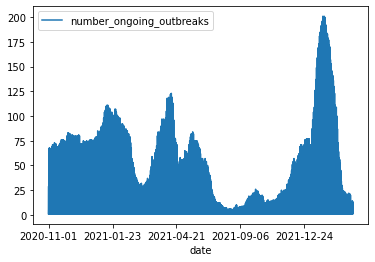

In [68]:
Outbreaks_Ontario.plot(x ='date', y='number_ongoing_outbreaks', kind = 'line')
plt.show()

- **To find the historic mean of the daily outbreaks since the beginning of Covid-19 as per the Dataset**

In [69]:
Outbreaks_Ontario = Outbreaks_Ontario.groupby('date').sum('number_ongoing_outbreaks')
Outbreaks_Ontario_ = Outbreaks_Ontario.drop('phu_num', axis = 1)
Outbreaks_Ontario_Mean = Outbreaks_Ontario_.mean() 
print (Outbreaks_Ontario_)
print (Outbreaks_Ontario_Mean)

            number_ongoing_outbreaks
date                                
2020-11-01                       460
2020-11-02                       460
2020-11-03                       473
2020-11-04                       491
2020-11-05                       502
...                              ...
2022-03-10                       203
2022-03-11                       203
2022-03-12                       201
2022-03-13                       204
2022-03-14                       203

[499 rows x 1 columns]
number_ongoing_outbreaks    545.012024
dtype: float64


###### *545 cases were registerd on an average per day according to this Dataset for Ontario.*

- **To find the mean of the daily outbreaks for the month of March as per the Dataset**

In [70]:
Outbreaks_Ontario = pd.read_csv("F:\Shivam\Academics_Term 1\Big Data Fundamentals\Project\ongoing_outbreaks_phu.csv")
df = Outbreaks_Ontario

Outbreaks_March_Ontario = df. loc[(df["date"] >= "2022-03-01") & (df["date"] <= "2022-03-14")]
Outbreaks_March_Ontario = Outbreaks_March_Ontario.groupby('date').sum('number_ongoing_outbreaks')
Outbreaks_March_Ontario = Outbreaks_March_Ontario.drop('phu_num', axis = 1)
Outbreaks_March_Ontario_Mean = Outbreaks_March_Ontario.mean()

print (Outbreaks_March_Ontario)
print (Outbreaks_March_Ontario_Mean)

            number_ongoing_outbreaks
date                                
2022-03-01                       270
2022-03-02                       246
2022-03-03                       240
2022-03-04                       237
2022-03-05                       240
2022-03-06                       230
2022-03-07                       227
2022-03-08                       217
2022-03-09                       202
2022-03-10                       203
2022-03-11                       203
2022-03-12                       201
2022-03-13                       204
2022-03-14                       203
number_ongoing_outbreaks    223.071429
dtype: float64


###### *223 cases were registerd on an average per day in the Month of March according to this Dataset for Ontario.*

**To conclude, we can say that the number of cases regisered per day as of the latest updated dataset is 50% of the historic average. This means the situation is getting under control which can be seen from the above graph as well.**

# 5. To Visualize the data about affected groups in Ontario

In [71]:
Outbreaks_Ontario = pd.read_csv("F:\Shivam\Academics_Term 1\Big Data Fundamentals\Project\ongoing_outbreaks_phu.csv")

In [72]:
df  = Outbreaks_Ontario.groupby('outbreak_group').sum('number_ongoing_outbreaks')
df  = df.drop(columns = 'phu_num', axis = 1)

print (df)

                     number_ongoing_outbreaks
outbreak_group                               
1 Congregate Care                       90964
2 Congregate Living                     42918
3 Education                             57655
4 Workplace                             58097
5 Recreational                          14742
6 Other/Unknown                          7585


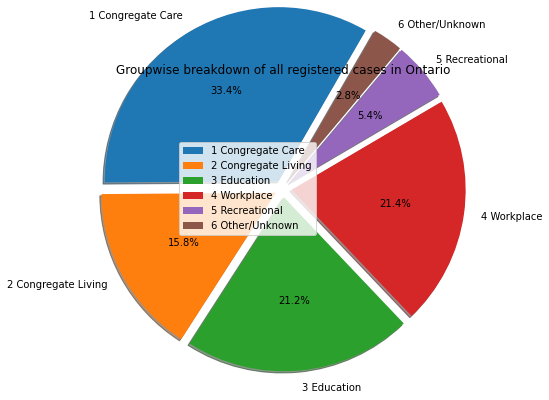

In [73]:
df.plot(label = '', title = "Groupwise breakdown of all registered cases in Ontario", kind = "pie", y = "number_ongoing_outbreaks", legend = 1, radius = 2, shadow = True, autopct = "%1.1f%%", startangle = 60, explode = [0.1,0.1,0.1,0.1,0.1,0.1])
plt.legend(loc = 6)